In [ ]:
### 🔧 TAREA
# Compara el desempeño de la red neuronal con la regresión logística. Analiza sus métricas, curva ROC y precisión vs. recall.

In [61]:
rm ../models/nn1_model.keras


rm: ../models/nn1_model.keras: No such file or directory


In [63]:
import sys
sys.path.append("../src")

import train
import model
import utils
import evaluate as ev

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [3]:
# 🔧 Cargar configuración
#config = train.load_config("../config.yaml")

In [5]:
# 📦 Cargar y preparar los datos
#X, y = train.load_data("/Users/juanpablovargasherrera/Documents/GitHub/tarea-2/DeepNeuralNetworkUSS/Projects/Credit/data/credit_clean.csv")
#X_train, X_test, y_train, y_test = train.preprocess(X, y, config)

In [65]:
from train import load_config, load_data, preprocess, train_model
from model import build_model

# Cargar configuración
config = load_config("/Users/juanpablovargasherrera/Documents/GitHub/tarea-2/config.yaml")
X, y = load_data("/Users/juanpablovargasherrera/Documents/GitHub/tarea-2/DeepNeuralNetworkUSS/Projects/Credit/data/credit_clean.csv")
X_train, X_test, y_train, y_test = preprocess(X, y, config)

# Construir y entrenar modelo
model = build_model(config, input_dim=X_train.shape[1])
history = train_model(model, X_train, y_train, config)

# Guardar modelo
model.save("/Users/juanpablovargasherrera/Documents/GitHub/tarea-2/models/nn1_model.keras")

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6642 - loss: 0.8292 - val_accuracy: 0.7504 - val_loss: 0.6392
Epoch 2/100
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7457 - loss: 0.6274 - val_accuracy: 0.7442 - val_loss: 0.5996
Epoch 3/100
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7476 - loss: 0.5851 - val_accuracy: 0.7590 - val_loss: 0.5642
Epoch 4/100
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7569 - loss: 0.5588 - val_accuracy: 0.7584 - val_loss: 0.5489
Epoch 5/100
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7529 - loss: 0.5517 - val_accuracy: 0.7582 - val_loss: 0.5462
Epoch 6/100
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7513 - loss: 0.5454 - val_accuracy: 0.7570 - val_loss: 0.5383
Epoch 7/100
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7586 - loss: 0.5362 - val_accuracy: 0.7545 - val_loss: 0.5401
Epoch 8/100
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7532 - loss: 0.5397 - val_accuracy: 0.7609

In [67]:
# 🧪 Entrenar modelo base (Regresión Logística)
base_model = LogisticRegression(max_iter=1000)
base_model.fit(X_train, y_train)

# 🔍 Predicciones del modelo base
y_pred_log = base_model.predict(X_test)
y_proba_log = base_model.predict_proba(X_test)[:, 1]

In [85]:
# 📥 Cargar modelo entrenado Red Neuronal
from tensorflow.keras.models import load_model
nn_model = load_model("/Users/juanpablovargasherrera/Documents/GitHub/tarea-2/models/nn1_model.keras")

# 🔍 Predicciones de Red Neuronal
y_proba_nn = nn_model.predict(X_test).flatten()
y_pred_nn = ev.predict_with_threshold(y_proba_nn, threshold=0.25)

251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step


In [71]:
from sklearn.metrics import f1_score

print("🔎 F1-scores para distintos thresholds:")
for t in [0.3, 0.4, 0.5, 0.6, 0.7]:
    y_pred_temp = ev.predict_with_threshold(y_proba_nn, threshold=t)
    score = f1_score(y_test, y_pred_temp)
    print(f"Threshold: {t:.1f} - F1 Score: {score:.4f}")

🔎 F1-scores para distintos thresholds:
Threshold: 0.3 - F1 Score: 0.7521
Threshold: 0.4 - F1 Score: 0.7620
Threshold: 0.5 - F1 Score: 0.7492
Threshold: 0.6 - F1 Score: 0.7257
Threshold: 0.7 - F1 Score: 0.6884


In [87]:
# 📊 Evaluación individual
ev.evaluate_model(y_test, y_pred_log, y_proba_log, model_name="Regresión Logística")
ev.evaluate_model(y_test, y_pred_nn, y_proba_nn, model_name="Red Neuronal")


📊 Evaluación del modelo: Regresión Logística
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      4000
           1       0.76      0.65      0.70      4004

    accuracy                           0.72      8004
   macro avg       0.73      0.72      0.72      8004
weighted avg       0.73      0.72      0.72      8004

F1 Score     : 0.7009
Precision    : 0.7586
Recall       : 0.6513
ROC AUC      : 0.7968

📊 Evaluación del modelo: Red Neuronal
              precision    recall  f1-score   support

           0       0.84      0.43      0.57      4000
           1       0.62      0.92      0.74      4004

    accuracy                           0.67      8004
   macro avg       0.73      0.67      0.65      8004
weighted avg       0.73      0.67      0.65      8004

F1 Score     : 0.7376
Precision    : 0.6163
Recall       : 0.9183
ROC AUC      : 0.8344


{'f1': 0.7376128385155466,
 'precision': 0.616325846463292,
 'recall': 0.9183316683316683,
 'roc_auc': 0.8343833666333667}

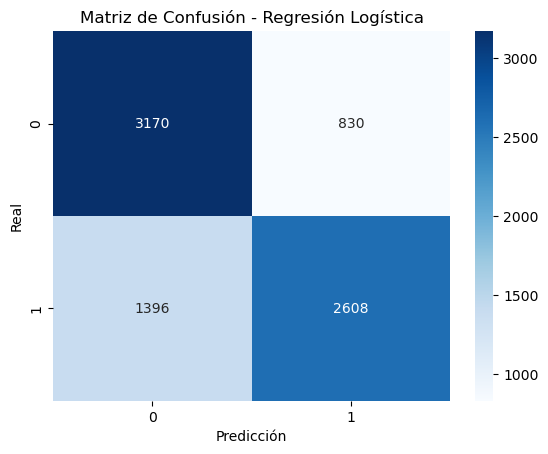

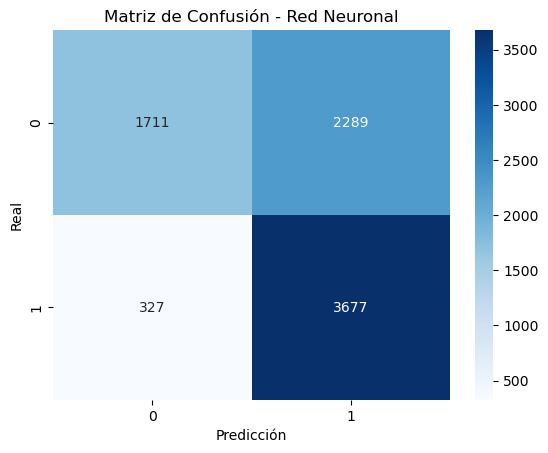

In [89]:
# 🧱 Matrices de Confusión
ev.plot_confusion_matrix(y_test, y_pred_log, model_name="Regresión Logística")
ev.plot_confusion_matrix(y_test, y_pred_nn, model_name="Red Neuronal")

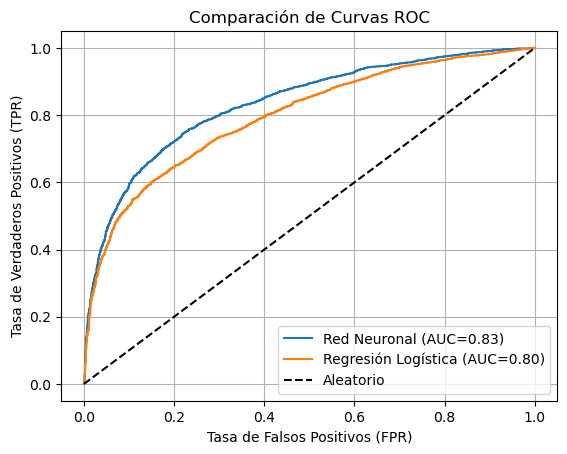

In [91]:
# 📈 Comparación de curvas ROC
ev.plot_roc_comparison(y_test, y_proba_nn, y_test, y_proba_log,
                       label1="Red Neuronal", label2="Regresión Logística")

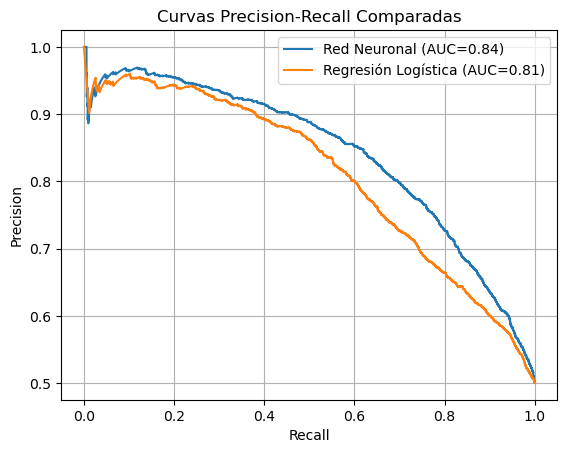

In [93]:
# 🔍 Comparación de curvas Precision-Recall
ev.plot_precision_recall_curves(y_test, y_proba_nn, y_test, y_proba_log,
                                 label1="Red Neuronal", label2="Regresión Logística")

In [95]:
# 📋 Comparación de métricas en tabla
df_metrics = ev.compare_models_metrics(
    y_test, y_pred_nn, y_proba_nn,
    y_test, y_pred_log, y_proba_log,
    model_name_1="Red Neuronal",
    model_name_2="Regresión Logística"
)

import IPython.display as display
display.display(df_metrics)

,Modelo,Precision,Recall,F1-score,ROC AUC
0,Red Neuronal,0.616326,0.918332,0.737613,0.834383
1,Regresión Logística,0.758581,0.651349,0.700887,0.796762


In [ ]:
### 📊 Pregunta de reflexión
#¿En qué umbral se maximiza el F1-score para cada modelo? ¿Te parece razonable utilizar 0.5 como punto de corte en este contexto?

#El mejor F1-score fue logrado con 0,3 en la red neuronal; sin embargo, encuentro que en el contexto de este negocio no es razonable 
# mantener el 0.5 como punto de corte, es preferible evitar que se pierda dinero con un sistema de alerta temprana (alto recall), aún cuando
# debo potencialmente perder algunos buenos clientes al denegarles productos (baja precisión)

#¿Es uno de los modelos más conservador o arriesgado que el otro?

# si, la red neuronal es más arriesgada, pues detecta una gran cantidad de clientes que estarán en default, pero se equivoca más 
# al identificar como morosos a quienes no lo son. Por su parte, la regresión es más conservadora, pues corre el riesgo de marcar 
# como moroso a alguien que no lo es, esto implica sacrificar más clientes que efectivamente estarán en default y por ende, perder plata.